## Analyze A/B Test Results

This project focuses on performing A/B test and interpret the results of the test run for an e-commerce website. The data used is provided by the e-commerce company. This analysis is designed to help the e-commerce company make the decision of whether to launch or not launch the new webpage.

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

The e-commerce company has developed a new web page with the purpose of increasing number of users who pay for the company's product. Data of the experiment is in 2 csv files. Goal of this analysis is to use that data and help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
### Part I - Probability


importing the libraries needed for this notebook.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')

In [4]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


number of rows in the dataset.

In [12]:
len(df)

294478

The number of unique users in the dataset.

In [13]:
df['user_id'].nunique()

290584

The proportion of users converted.

In [14]:
(df['converted']).mean()

0.11965919355605512

The number of times the `new_page` and `treatment` don't line up.

In [15]:
len(df.query("landing_page=='old_page' and group!='control'"))

1965

In [16]:
len(df.query("landing_page=='new_page' and group!='treatment'"))

1928

f. Do any of the rows have missing values?

In [11]:
df.isnull().all()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [17]:
df2=df.copy()

In [18]:
df2.drop((df2.query("landing_page=='old_page' and group!='control'")).index, axis=0, inplace=True)

In [19]:
df2.drop((df2.query("landing_page=='new_page' and group!='treatment'")).index, axis=0, inplace=True)

In [20]:
df2.shape, df.shape

((290585, 5), (294478, 5))

In [21]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [22]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [23]:
df2['user_id'].nunique()

290584

In [24]:
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

In [21]:
 df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [22]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [25]:
df2.drop(df2[df2['user_id'].duplicated()].index, axis=0, inplace=True)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [26]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [27]:
sum(df2['converted']==1)/len(df2)

0.11959708724499628

In [28]:
len(df2.query("converted==1"))/len(df2)

0.11959708724499628

In [29]:
(df2['converted']).mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [30]:
len(df2.query("group=='control' and converted==1"))/len(df2.query("group=='control'"))

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [31]:
len(df2.query("group=='treatment' and converted==1"))/len(df2.query("group=='treatment'"))

0.11880806551510564

d. What is the probability that an individual received the new page?

In [32]:
len(df2.query("landing_page=='new_page'"))/len(df2)

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

- No, as the conversion rates probability are very close to each other. i.e. 0.1203863045004612 and 0.11880806551510564. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, we could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do we stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain period of time?  How long do we run to arrive at a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

In [33]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [34]:
len(df2)

290584

**Answer:** 
<br>1) Null Hypothesis (H0) = Conversion rate for old page is greater than or equal to new page. OR **$p_{old}$** >= **$p_{new}$** 
<br>2) Alternative hypothesis (H1) = Conversion rate for old page is less than new page. OR **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Below cells provide the necessary parts of this simulation.  <br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [35]:
df_p_new=df2.query("landing_page=='new_page'")

In [36]:
df_p_new.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [37]:
df_p_new[df_p_new['group']=='control']

,user_id,timestamp,group,landing_page,converted


In [38]:
(df2['converted']).mean()

0.11959708724499628

In [39]:
(df2['converted']).std()

0.32449034857932374

In [40]:
(df2[df2['landing_page']=='new_page']['converted']).mean()

0.11880806551510564

In [41]:
df2.query('landing_page=="new_page"')['user_id'].nunique()

145310

In [42]:
df2.query('landing_page=="new_page"')['user_id'].shape

(145310,)

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [43]:
(df2[df2['landing_page']=='old_page']['converted']).mean()

0.1203863045004612

c. What is $n_{new}$?

In [44]:
df2[df2['landing_page']=='new_page']['user_id'].nunique()

145310

d. What is $n_{old}$?

In [45]:
df2[df2['landing_page']=='old_page']['user_id'].nunique()

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [46]:
b_sample = (df2.query('landing_page=="new_page"')).sample(145310, replace=True)
new_page_converted = b_sample['converted']
new_page_converted.shape

(145310,)

In [47]:
sim_p_new = new_page_converted.mean()
sim_p_new

0.11923473952240038

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [48]:
b_sample = (df2.query('landing_page=="old_page"')).sample(145274, replace=True)
old_page_converted = b_sample['converted']
old_page_converted.shape

(145274,)

In [49]:
sim_p_old = old_page_converted.mean()
sim_p_old

0.12121921334856892

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [50]:
sim_p_new - sim_p_old

-0.001984473826168537

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [51]:
p_diffs = []
for _ in range(10000):
    b_sample = (df2.query('landing_page=="new_page"')).sample(10000, replace=True)
    new_page_converted = b_sample['converted']
    b_sample = (df2.query('landing_page=="old_page"')).sample(10000, replace=True)
    old_page_converted = b_sample['converted']
    sim_p_new = new_page_converted.mean()
    sim_p_old = old_page_converted.mean()
    p_diffs.append(sim_p_new - sim_p_old)
    
    
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

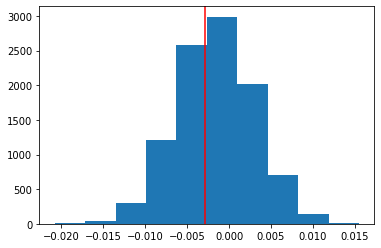

In [52]:
plt.hist(p_diffs)
plt.axvline(x=-0.002816, color='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [53]:
p_diffs = np.asarray(p_diffs)

In [54]:
((p_diffs) > -0.002816).mean()

0.603

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.==** This is called a 'p' value. This is very big and as Type I error rate was given in the beginning to be 5% (0.05). A big 'p' value tells us that we stick with Null hypothesis. In other words we fail to reject Null Hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [55]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [56]:
len(df2.query('group=="control" and landing_page=="old_page"'))

145274

In [57]:
len(df2.query('group=="treatment" and landing_page=="new_page"'))

145310

In [58]:
import statsmodels.api as sm


convert_old = 17489
convert_new = 17264
n_old = 145274
n_new = 145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [59]:
zstat, pval = sm.stats.proportions_ztest(convert_old, n_old, -0.002816 )
zstat, pval

(144.30395887581184, 0.0)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:** 
<br>Values computed here do not agree with earlier 'p' value. Earlier p value was in accordance with Null hypothesis. Here p value is 0 which is very low and less than alpha (0.05) so by this we reject Null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**
<br>As conversion is either 'Yes' or 'No', it is a categorical variable, we should use logistic regression.

b. The goal is to use **statsmodels** to fit the regression model specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  
However, first we need to create a column for the intercept, and create a dummy variable column for which page each user received.  
Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if receives **control**.

In [60]:
df3= df2.copy()
df3.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [61]:
df3['intercept'] = 1
df3[['ab_page','cont_page']] = pd.get_dummies(df3['landing_page'])
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,cont_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns created in part **b.** to predict whether or not an individual converts.

In [62]:
logit_model = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of model below, and use it as necessary to answer the following questions.

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Dec 2020   Pseudo R-squ.:               8.077e-06
Time:                        11:54:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value found in the **Part II**?
<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:**<br>
'p' value calculated here in the output is .190, it is different from earlier values and I think the reason is because of the application of logstic regrtession model, which is specially designed for analyzing categorical variable.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [64]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,cont_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


**Answer:** 
<br>A derived column with duration could be added to the model. There could be a disadvantage if we have same users getting both versions of page as that would induce effects of correlation in the analysis as user will be thinking "Oh this looks new" and will spend more time on the page.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [65]:
df4=pd.read_csv('countries.csv')

In [66]:
df4.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [67]:
len(df3), len(df4)

(290584, 290584)

In [68]:
df4 = df4.merge(df3, on ='user_id')

In [69]:
df4.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,cont_page
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [70]:
df4['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [71]:
df4[['CA','UK','US']] = pd.get_dummies(df4['country'])

In [72]:
df4.head()

,user_id,country,timestamp,group,landing_page,converted,intercept,ab_page,cont_page,CA,UK,US
0,834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
1,928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
2,822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
3,711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
4,710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


In [73]:
logit_model = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'CA','UK']])

In [74]:
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [75]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Dec 2020   Pseudo R-squ.:               2.323e-05
Time:                        11:58:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

#### Conclusion
Interpreting information provided in coefficient and 'p' value columns we understand following things:
<br>
1) Probability of converted is highest for UK followed by US (which is our baseline for model fitting) and least for CA. So country definitely has an impact on conversion.In other words individual from UK is more likely to convert compared to US, followed by CA.<br>
2) None of the 'p' values are significantly small. Therefore it is not statitically significant.